In [37]:
from utils import *
from dipole import *
import pickle

In [38]:
15500000/15e6,750/15e6

(1.0333333333333334, 5e-05)

In [39]:
from collections import Counter
image_dir_search = 'proc/*.fits'
temperatures = []


for image in glob.glob(image_dir_search):
    temp = re.findall('_\d+k',image)[0][1:-1]
    if 'dtph' not in image:
        continue
    # if temp not in temperatures:
   
    temperatures.append(temp)
temperatures_strs = np.array(temperatures)

print(Counter(temperatures_strs))
# temperatures = np.unique(np.sort(temperatures))
temps = np.sort(np.array([int(t) for t in temperatures_strs]))

Counter({np.str_('200'): 58, np.str_('197'): 50, np.str_('183'): 50, np.str_('180'): 50, np.str_('193'): 50, np.str_('190'): 50, np.str_('207'): 50, np.str_('203'): 50, np.str_('187'): 50, np.str_('155'): 36, np.str_('170'): 36, np.str_('160'): 36, np.str_('145'): 36, np.str_('195'): 36, np.str_('125'): 36, np.str_('210'): 36, np.str_('140'): 36, np.str_('175'): 36, np.str_('130'): 36, np.str_('185'): 36, np.str_('150'): 36, np.str_('165'): 36, np.str_('135'): 36})


In [40]:
total_num_images = 0
for t in Counter(temperatures):
    print(t,Counter(temperatures)[t])
    total_num_images +=Counter(temperatures)[t]
total_num_images

155 36
170 36
160 36
200 58
145 36
195 36
125 36
197 50
183 50
180 50
193 50
190 50
210 36
207 50
140 36
175 36
130 36
185 36
203 50
150 36
165 36
187 50
135 36


962

In [41]:
temperatures = [125, 130, 135, 140, 145, 150, 155, 165, 175, 180, 183, 185]
# temperatures = [185]

In [42]:
search_str = 'proc/*190k*.fits'
imagefiles = glob.glob(search_str)


for imagefile in imagefiles:
    try:  
        dtph = int(re.findall('dtph\d+_',imagefile)[0][4:-1])
    except:
        continue
    image = get_qdata(imagefile,3)
    image = crop_qdata(image)#,ylower=500,xlower=100)
    image = approximate_electronize(image,400)


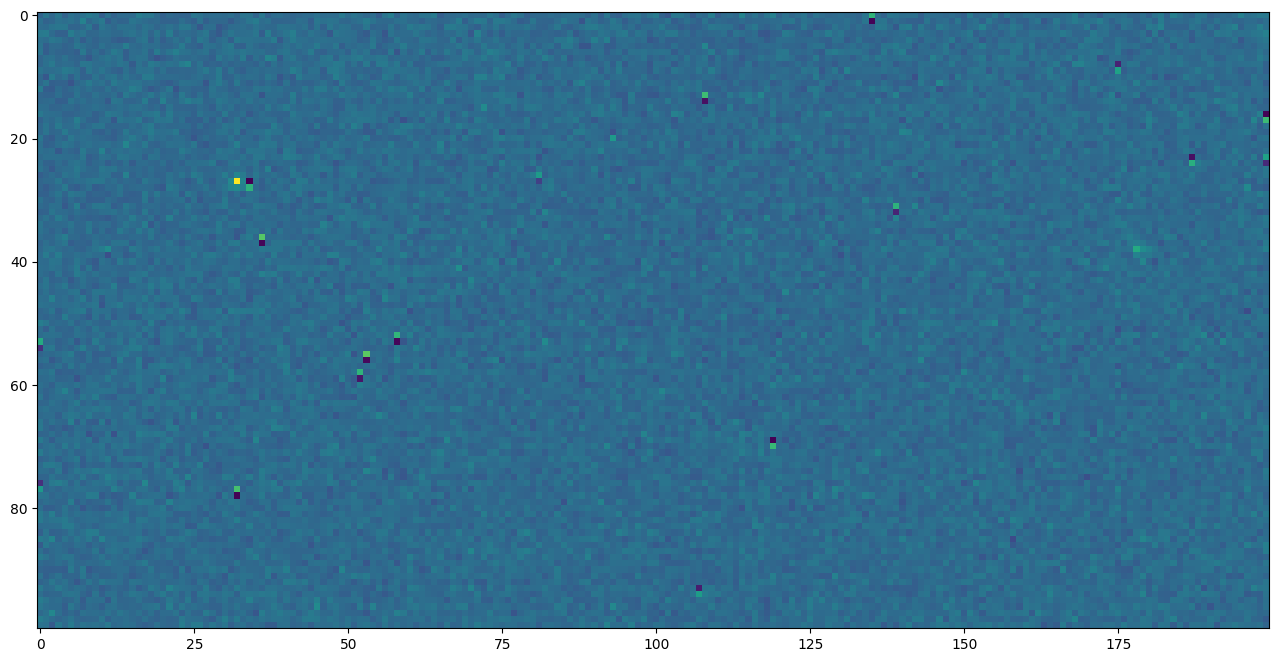

-64.0
60.0
-3840.0
60.0 64.0
True
(510, 3072)
-826281
1
[536]


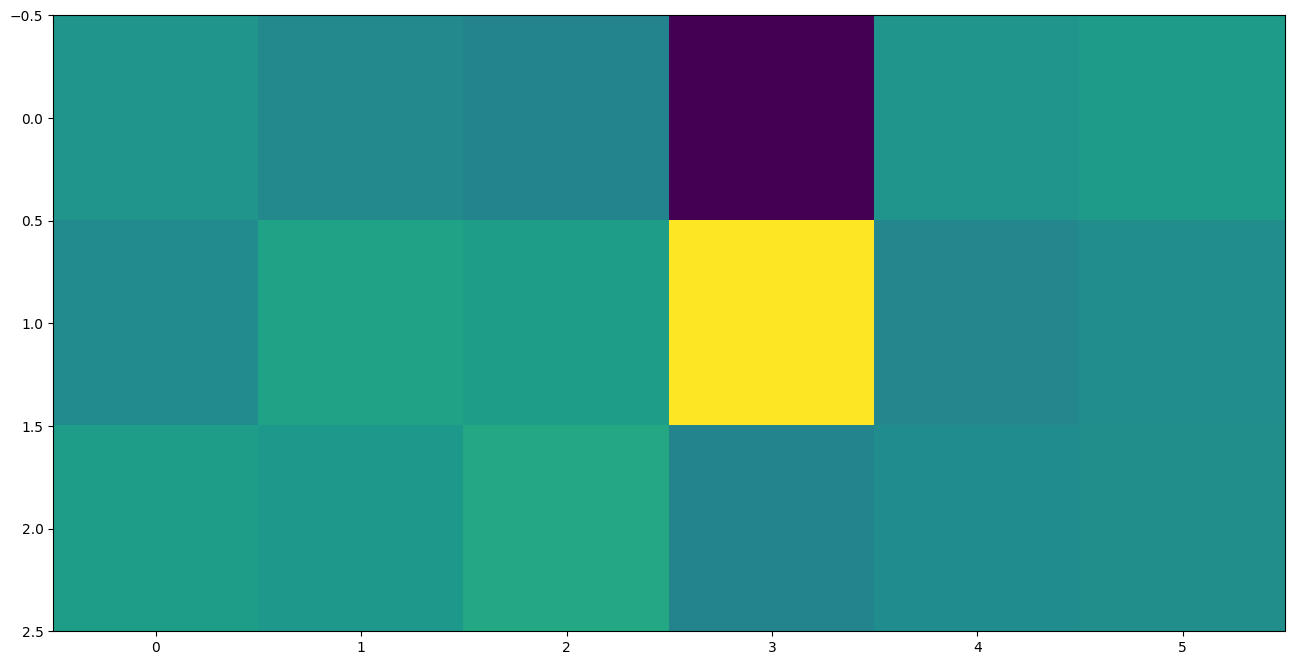

In [43]:
median_charge_per_row = np.median(image,axis=1)

sub_image = image.T -median_charge_per_row
sub_image = sub_image.T #image with median charge per row s

rowstart = 0
rowend = rowstart + 100

colstart = 200
colend = colstart + 200

plt.figure(figsize=(24,8))
plt.imshow(sub_image[rowstart:rowend,colstart:colend])
plt.show()
plt.close()
print(sub_image[61,73])
print(sub_image[62,73])
print(sub_image[61,73] * sub_image[62,73])


charge1 = np.abs(sub_image[62,73])
charge2 = np.abs(sub_image[61,73])
print(charge1,charge2)
print(comparable_perc(charge1,charge2))
test_row= 63

print(sub_image.shape)
sigma_cutoff = -1 * (3 * 303)**2
print(sigma_cutoff)
mult = sub_image[test_row,:] * sub_image[test_row-1,:]
print(np.sum(mult < sigma_cutoff))
col_locs = np.where(mult < sigma_cutoff)[0]
print(col_locs)
if len(col_locs > 0):
    row,col = test_row,col_locs[0]

    plt.figure(figsize=(24,8))
    plt.imshow(sub_image[test_row-1:test_row+2,col-3:col+3])
    plt.show()
    plt.close()
# plt.title(imagefile)
# plt.show()
# plt.close()


In [44]:
temperatures = np.unique(temps)

In [45]:

# goodQuads = [0,1,2,3]
# image_dir = 'proc/'
# test_temps = temperatures


# for test_temp in test_temps:
#     dpcoordlist_test = getDipoleList2(image_dir,[test_temp],goodQuads)
#     print("****************************")
#     print(f'# of images at {test_temp}',Counter(temperatures_strs)[str(test_temp)])
#     print(f'# of dipoles at {test_temp}',np.sum([len(dpcoordlist_test[q]) for q in goodQuads]))
#     print("****************************")

temperature: 125
# All Dipoles 114
# Good Dipoles 107
# Anomalous Dipoles 7
Number of total dipoles quadrant 0:  107
Number of traps quadrant 0:  107
temperature: 125
# All Dipoles 82
# Good Dipoles 73
# Anomalous Dipoles 9
Number of total dipoles quadrant 1:  73
Number of traps quadrant 1:  73
temperature: 125
# All Dipoles 88
# Good Dipoles 83
# Anomalous Dipoles 5
Number of total dipoles quadrant 2:  83
Number of traps quadrant 2:  83
temperature: 125
# All Dipoles 104
# Good Dipoles 93
# Anomalous Dipoles 11
Number of total dipoles quadrant 3:  93
Number of traps quadrant 3:  93
Total Dipoles
356
Total Traps
356
****************************
# of images at 125 36
# of dipoles at 125 356
****************************
temperature: 130
# All Dipoles 79
# Good Dipoles 68
# Anomalous Dipoles 11
Number of total dipoles quadrant 0:  68
Number of traps quadrant 0:  68
temperature: 130
# All Dipoles 59
# Good Dipoles 51
# Anomalous Dipoles 8
Number of total dipoles quadrant 1:  51
Number of t

In [46]:

goodQuads = [0,1,2,3]
image_dir = 'proc/'
test_temps = temperatures


try:
    with open('dipole_coord_list.pkl','rb') as infile:
        full_dipole_coord_list = pickle.load(infile)
except FileNotFoundError:
    full_dipole_coord_list = getDipoleList2(image_dir,test_temps,goodQuads)
    with open('dipole_coord_list.pkl','wb') as outfile:
        pickle.dump(full_dipole_coord_list,outfile)
# print(f'# of images at {test_temp}',Counter(temperatures_strs)[str(test_temp)])

In [47]:
total = 0
for q in [0,1,2,3]:
    total += len(full_dipole_coord_list[q])
total

5171

In [48]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import pdist
# from tqdm.autonotebook import tqdm
# def simulate_random_distance_distributions(num_points, num_simulations=1000, x_range=(0, 512), y_range=(0, 3072)):
#     all_simulated_distances = []

#     for _ in tqdm(range(num_simulations)):
#         # Generate uniformly random x and y coordinates
#         x_random = np.random.uniform(x_range[0], x_range[1], size=(num_points, 1))
#         y_random = np.random.uniform(y_range[0], y_range[1], size=(num_points, 1))

#         # Stack to get (num_points, 2) array
#         random_coords = np.hstack((x_random, y_random))

#         # Compute pairwise distances
#         distances = pdist(random_coords)
#         all_simulated_distances.append(distances)

#     # Flatten to single array
#     return np.concatenate(all_simulated_distances)
# mc_distances = simulate_random_distance_distributions(5000, num_simulations=100, x_range=(0, 512), y_range=(0, 3072))

In [49]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.interpolate import UnivariateSpline
from tqdm.autonotebook import tqdm

def monte_carlo_distance_histograms(
    n_points,
    grid_width,
    grid_height,
    num_samples=1000,
    num_bins=100,
    confidence_level=0.90,
    spline_smoothing=0.5,  # Lower = smoother
    return_spline=True
):
    """
    Monte Carlo simulation to estimate the distribution of pairwise distances
    for randomly distributed coordinates in a bounded grid.
    
    Returns:
        bin_centers: centers of distance bins
        mean_hist: mean histogram over samples
        ci_lower: lower bound of confidence interval
        ci_upper: upper bound of confidence interval
        spline (optional): spline fit of mean histogram
    """
    montecarlo_hists = []
    
    max_distance = np.hypot(grid_width, grid_height)
    bin_edges = np.linspace(0, max_distance, num_bins + 1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    for _ in tqdm(range(num_samples), desc="Monte Carlo simulation"):
        random_points = np.column_stack((
            np.random.uniform(0, grid_width, n_points),
            np.random.uniform(0, grid_height, n_points)
        ))
        distances = pdist(random_points)
        hist, _ = np.histogram(distances, bins=bin_edges, density=True)
        montecarlo_hists.append(hist)

    montecarlo_hists = np.array(montecarlo_hists)
    mean_hist = montecarlo_hists.mean(axis=0)

    # Compute confidence intervals
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    ci_lower = np.percentile(montecarlo_hists, lower_percentile, axis=0)
    ci_upper = np.percentile(montecarlo_hists, upper_percentile, axis=0)

    if return_spline:
        spline = UnivariateSpline(bin_centers, mean_hist, s=spline_smoothing)
        return bin_centers, mean_hist, ci_lower, ci_upper,montecarlo_hists, spline
    else:
        return bin_centers, mean_hist, ci_lower, ci_upper,montecarlo_hists


In [50]:
try:
    with open('mc_dist.pkl','rb') as infile:
        mcdict = pickle.load(infile)
    montecarlo_hists = mcdict['montecarlo_hists']
    mc_bin_centers = mcdict['mc_bin_centers']
    mc_mean = mcdict['mc_bin_cemc_meannters']
    ci_lower = mcdict['ci_lower']
    ci_upper = mcdict['ci_upper']


except FileNotFoundError:
    mc_bin_centers, mc_mean, ci_lower, ci_upper,montecarlo_hists = monte_carlo_distance_histograms(
    n_points=total//4,
    grid_width=3072,
    grid_height=512,
    num_samples=10000,
    num_bins=100,
    confidence_level=0.90,
    spline_smoothing=0,
    return_spline=False
    )
    mcdict = {}
    mcdict['mc_bin_centers'] = mc_bin_centers
    mcdict['mc_bin_cemc_meannters'] = mc_mean
    mcdict['ci_lower'] = ci_lower
    mcdict['ci_upper'] = ci_upper
    mcdict['montecarlo_hists'] = montecarlo_hists

    with open('mc_dist.pkl','wb') as outfile:
        pickle.dump(mcdict,outfile)







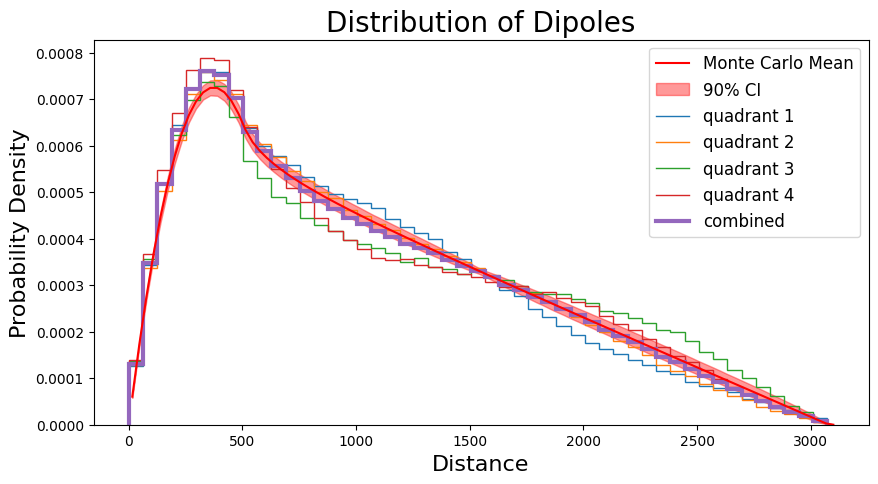

In [51]:
#analyze spatial distribution here
# 90% confidence interval
plt.figure(figsize=(10,5))
plt.plot(mc_bin_centers, mc_mean, label='Monte Carlo Mean', color='red')
plt.fill_between(mc_bin_centers, ci_lower, ci_upper, color='red', alpha=0.4, label='90% CI')
# plt.plot(mc_bin_centers, spline(mc_bin_centers), label='Spline Fit', color='black', linestyle='--')

from scipy.spatial.distance import pdist
bins_ = np.linspace(0,3072,50)

all_hists = np.zeros(len(bins_)-1)
for q in [0,1,2,3]:
    quad_dipoles = np.array(full_dipole_coord_list[q])
    distances = pdist(quad_dipoles)
    hist,bins = np.histogram(distances,bins=bins_,density=False)
    pdf,bins = np.histogram(distances,bins=bins_,density=True)
    all_hists += hist
    plt.stairs(pdf,bins,label=f'quadrant {q+1}')



bin_widths = np.diff(bins)
pdf = all_hists / (np.sum(all_hists) * bin_widths)

# mchist,bins = np.histogram(mc_distances,bins=bins)
# mchist = mchist/np.sum(mchist)
plt.stairs(pdf,bins,label='combined',lw=3)

plt.legend(fontsize=12)
# print(np.max(distances))
# plt.hist(distances)
plt.xlabel('Distance',fontsize=16)
plt.ylabel('Probability Density',fontsize=16)
plt.title('Distribution of Dipoles',fontsize=20)
plt.show()
plt.close()

In [52]:
try:
    with open('dipole_spectra.pkl','rb') as infile:
        dipole_spectra = pickle.load(infile)
except FileNotFoundError:
    dipole_spectra = getDipoleSpectra2(image_dir,goodQuads,full_dipole_coord_list)
    with open('dipole_spectra.pkl','wb') as outfile:
        pickle.dump(dipole_spectra,outfile)

In [53]:
# max_dp = 1
# count = 0
# q = 3
# from scipy.optimize import curve_fit
# for dp in list(dipole_spectra[q].keys()):
    
#     count +=1
#     if count > max_dp:
#         break

#     for temp in list(dipole_spectra[q][dp].keys()):
#         hists = dipole_spectra[q][dp][temp]['hist']
#         bins = dipole_spectra[q][dp][temp]['bins'][0]
#         print('local sigma hist','image sigma hist')
#         local_sigma = np.average(dipole_spectra[q][dp][temp]['intensity_err'])
#         print(np.average(dipole_spectra[q][dp][temp]['intensity_err']),2*dipole_spectra[q][dp][temp]['image_sigma'])
#         # print(hist.shape,bins.shape)
#         hist = np.sum(hists,axis=0)
#         mids = 0.5*(bins[1:] + bins[:-1])
#         popt, pcov = curve_fit(gauss, mids, hist, p0=[np.mean(hist), local_sigma,np.max(hist)])
#         print('fit mean, sigma')
#         sigma = np.abs(popt[1])/2
#         mean = popt[0]
#         print(mean,sigma)
#         xs = np.linspace(-1000,1000,100)
#         plt.plot(xs,gauss(xs,*popt))
#         plt.stairs(hist,bins)
#         plt.show()
#         plt.close()
    


In [54]:

# useIntensityErr = True
# wellBehavedThreshold = 3
# threshold_str = f'_{wellBehavedThreshold}'
# intensity_str = '_err' if useIntensityErr else ''
# # try:
# #     with open(f'fit_dipole_spectra{intensity_str}{threshold_str}.pkl','rb') as infile:
# #         fit_dipole_spectra = pickle.load(infile)

# # except FileNotFoundError:
# fit_dipole_spectra_3 = fitTrapIntensity_cutflow(dipole_spectra,useIntensityErr=useIntensityErr,wellBehavedThreshold=wellBehavedThreshold)
#     # with open(f'fit_dipole_spectra{intensity_str}{threshold_str}.pkl','wb') as outfile:
#     #     pickle.dump(fit_dipole_spectra,outfile)


In [55]:
10881 + 36058 + 35019

81958

In [56]:
# with open(f'fit_dipole_spectra{intensity_str}{threshold_str}.pkl','wb') as outfile:
#     pickle.dump(fit_dipole_spectra_3,outfile)

In [57]:

useIntensityErr = True
wellBehavedThreshold = 4
threshold_str = f'_{wellBehavedThreshold}'
intensity_str = '_err' if useIntensityErr else ''
try:
    with open(f'fit_dipole_spectra{intensity_str}{threshold_str}.pkl','rb') as infile:
        fit_dipole_spectra = pickle.load(infile)

except FileNotFoundError:
    fit_dipole_spectra = fitTrapIntensity(dipole_spectra,useIntensityErr=useIntensityErr,wellBehavedThreshold=wellBehavedThreshold)
    with open(f'fit_dipole_spectra{intensity_str}{threshold_str}.pkl','wb') as outfile:
        pickle.dump(fit_dipole_spectra,outfile)


Total number of traps: 
5171
number of traps with no good intensity fits
1783
number of traps that have >3 good intensity fits
2538
number of traps that have 3 good intensity fits
402
number of traps that have 2 good intensity fits
209
number of traps that have 1 good intensity fit
239


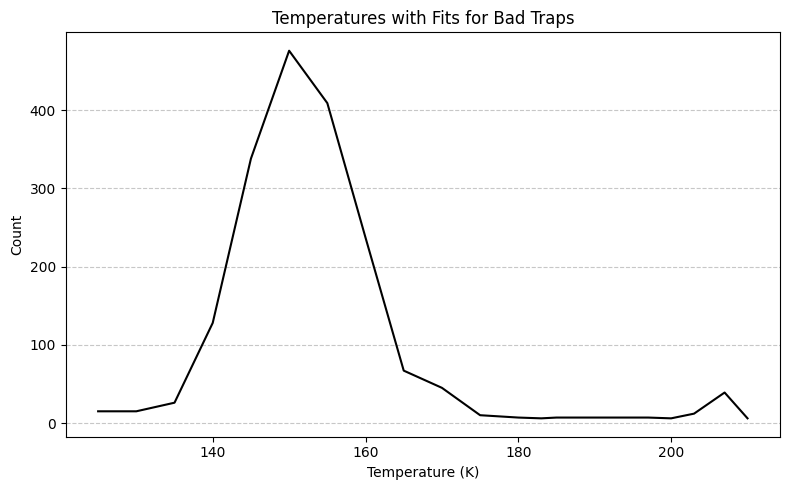

In [58]:

num_no_good_fits=0
badfits_temperatures = {}
good_temperatures_badtraps = {}
oneGoodFit = 0
twoGoodFit = 0
threeGoodFit = 0
goodTraps = 0
for q in [0,1,2,3]:
    dplist = list(fit_dipole_spectra[q].keys())
    fdsq = fit_dipole_spectra[q]
    for dpcoord in dplist:
        
   
        numGoodFits = 0
        for temp in fdsq[dpcoord].keys():
            if type(temp) != int:
                continue
            dpinfo = fdsq[dpcoord][temp]
            
            
            
            if dpinfo['GoodIntensityFit']:
                numGoodFits +=1
            if not fdsq[dpcoord]['WellBehavedTrap'] and dpinfo['GoodIntensityFit']:
                if temp not in good_temperatures_badtraps.keys():
                    good_temperatures_badtraps[temp] = 0
                good_temperatures_badtraps[temp] += 1
                

        if numGoodFits ==0:
            num_no_good_fits +=1
        elif numGoodFits == 1:
            oneGoodFit +=1
        elif  numGoodFits == 2:
            twoGoodFit +=1
        elif  numGoodFits == 3:
            threeGoodFit +=1
        elif numGoodFits >3:
            goodTraps+=1



print("Total number of traps: ")
total = np.sum([len(fit_dipole_spectra[q]) for q in range(4)])
print(total)
print("number of traps with no good intensity fits")
print(num_no_good_fits)
print("number of traps that have >3 good intensity fits")
print(goodTraps)
print("number of traps that have 3 good intensity fits")
print(threeGoodFit)
print("number of traps that have 2 good intensity fits")
print(twoGoodFit)

print("number of traps that have 1 good intensity fit")
print(oneGoodFit)

temps = sorted(good_temperatures_badtraps.keys())
counts = [good_temperatures_badtraps[t] for t in temps]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(temps, counts, color='black')

plt.xlabel('Temperature (K)')
plt.ylabel('Count')
plt.title('Temperatures with Fits for Bad Traps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.yscale('log')
plt.tight_layout()
plt.show()
plt.close()


# temps = sorted(badfits_temperatures.keys())
# counts = [badfits_temperatures[t] for t in temps]

# # # Plot
# # plt.figure(figsize=(8, 5))
# # plt.plot(temps, counts, color='black')

# # plt.xlabel('Temperature (K)')
# # plt.ylabel('Count')
# # plt.title('Temperatures with Successful Fits for Bad Traps')
# # plt.grid(axis='y', linestyle='--', alpha=0.7)
# # # plt.yscale('log')
# # plt.tight_layout()
# # plt.show()
# plt.close()

In [59]:
def closer_to_one(a, b):
    """Return the number (a or b) that is closer to 1."""
    return a if abs(a - 1) < abs(b - 1) else b

pvals = []
chi2s = []
linr2s = []
reduced_chi2s = []
numGood=0
r2s = []
lin_better_than_fit = []
dplist = list(fit_dipole_spectra[3].keys())
tau_rel_errors = []
for dpcoord in dplist:
# testdpcoord = dplist[2]
    for temp in fit_dipole_spectra[3][dpcoord].keys():
        if type(temp) != int:
            continue
        dpinfo = fit_dipole_spectra[3][dpcoord][temp]
        if not dpinfo['IntensityFitFailed']:
            pval = dpinfo['IntensityFitInfo']['p_value']
            pvals.append(pval)
            reduced_chi2s.append(dpinfo['IntensityFitInfo']['reduced_chi_squared'])

            chi2s.append(dpinfo['IntensityFitInfo']['chi_squared'])
            r2 = dpinfo['IntensityFitInfo']['r_squared']
            r2s.append(r2)
            linr2 = dpinfo['IntensityFitInfo']['lin_r_squared']
            linr2s.append(linr2)
            tau = dpinfo['IntensityFitInfo']['fit_tau']
            tau_err = dpinfo['IntensityFitInfo']['fit_tau_err']
            rel_error = tau_err/tau
            tau_rel_errors.append(rel_error)
            lbtf = r2 == closer_to_one(r2,linr2)
            
            if dpinfo['GoodIntensityFit']:
                numGood +=1
                lin_better_than_fit.append(lbtf)


pvals = np.array(pvals)
chi2s  = np.array(chi2s)
linr2s = np.array(linr2s)
reduced_chi2s = np.array(reduced_chi2s)
r2s = np.array(r2s)

tau_rel_errors  = np.array(tau_rel_errors)
np.sum(lin_better_than_fit),numGood

(np.int64(3733), 4284)

In [60]:
# bins = np.linspace(0,100,100)
# rtol = 0.25
# print('r2 too high')
# print(np.sum(r2s > 1 + rtol))
# print('r2 too low')
# print(np.sum(r2s < 1 - rtol))
# print('r2 in fit range')
# print(np.sum((r2s > 1-rtol) & (r2s < 1 + rtol)))
# hist,bins = np.histogram(r2s,bins=bins)
# plt.stairs(hist,bins,label='r2s')
# hist,bins = np.histogram(linr2s,bins=bins)
# plt.stairs(hist,bins,label='lin r2s')
# plt.title("$r^2$'")
# plt.legend()
# plt.yscale('log')

In [61]:
# hist,bins = np.histogram(tau_rel_errors,bins=100)
# plt.stairs(hist,bins)
# plt.title("rel_error")
# plt.yscale('log')

In [62]:
# hist,bins = np.histogram(pvals,bins=100)
# plt.stairs(hist,bins)
# plt.title("pvalue")
# np.sum(pvals>0)
# plt.yscale('log')

In [63]:
# np.min(chi2s),np.max(chi2s),np.min(reduced_chi2s),np.max(reduced_chi2s)

Text(0.5, 1.0, '$\\chi^2$')

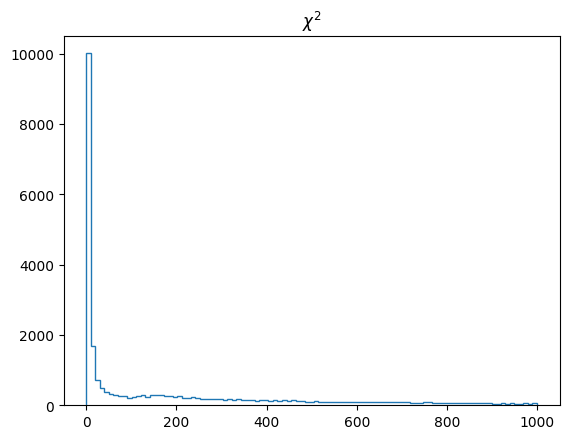

In [64]:
bins = np.linspace(0,1000,100)
hist,bins = np.histogram(chi2s,bins=bins)

plt.stairs(hist,bins)
plt.title("$\chi^2$")
# plt.yscale('log')


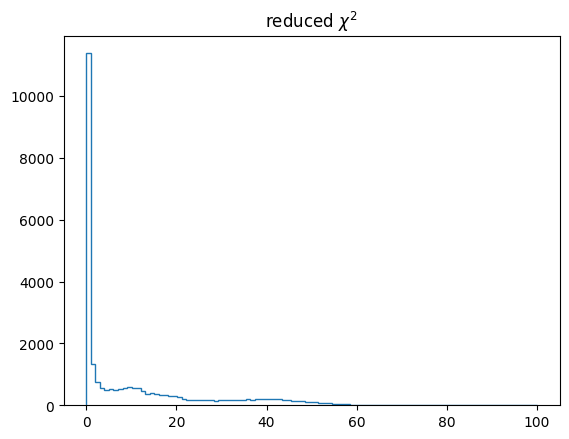

(np.int64(26877), np.int64(26877))

In [65]:
bins = np.linspace(0,100,100)
hist,bins = np.histogram(reduced_chi2s,bins=bins)

plt.stairs(hist,bins)
plt.title("reduced $\chi^2$")
# plt.xscale('log')

plt.show()
plt.close()
np.sum(reduced_chi2s < 100), np.sum(reduced_chi2s > 0)

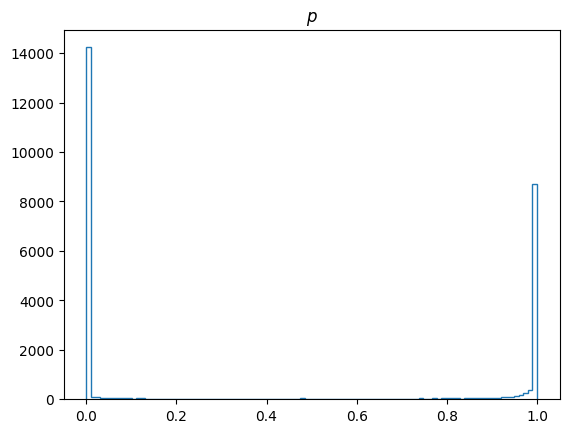

np.int64(12327)

In [66]:
import scipy.stats as stats
bins = np.linspace(0,1,100)


dofs = chi2s / reduced_chi2s
pvals = [1 - stats.chi2.cdf(chi2s[i], dofs[i]) for i in range(len(chi2s))]
pvals = np.array(pvals)
hist,bins = np.histogram(pvals,bins=bins)

plt.stairs(hist,bins)
plt.title("$p$")
# plt.xscale('log')
plt.show()
plt.close()
np.sum(pvals > 0.05)

In [67]:
# from scipy.optimize import curve_fit
# useIntensityErr=True
# import matplotlib.pyplot as plt
# from matplotlib import colors
# from scipy.stats import chi2
# dplist = list(fit_dipole_spectra[3].keys())
# testdpcoord = dplist[2]


# fig,ax = plt.subplots(2,figsize=(12,10))
# ax[0].set_xscale('log')
# ax[1].set_xscale('log')
# ax[0].set_title(f"Quad 3 dipole at {testdpcoord}")
# ax[1].set_title("Residuals of Fit")
# ax[0].set_xlabel("Seconds")
# ax[1].set_xlabel("Seconds")
# ax[0].set_ylabel("Intensity")

# cmap = plt.cm.RdBu_r
# norm = colors.Normalize(vmin=120,vmax=200)
# for temp in fit_dipole_spectra[3][testdpcoord].keys():
    
#     if type(temp) != int:
#         continue
    
#     color =cmap(norm(temp))
#     dpinfo = fit_dipole_spectra[3][testdpcoord][temp]
#     # print(dpinfo['GoodIntensityFit'])
#     # pval = dpinfo['IntensityFitInfo']['p_value']
#     print("************************")
#     print(f"Temparature = {temp}")
#     intensities = dpinfo['intensities']
#     # print()
#     seconds = dpinfo['seconds']
#     intensity_err = dpinfo['intensity_err'] if useIntensityErr else dpinfo['poisson_err']
#     max_tph = np.max(seconds)
#     tau_estimate = seconds[np.argmax(intensities)]
    
#     dtpc_estimate = np.max(intensities) * 8 / 3_000 / 5.2
#     popt, pcov = curve_fit(intensity_function, seconds, intensities,p0=[dtpc_estimate,tau_estimate],sigma=intensity_err,bounds=([0, 1e-8],[np.inf,1000]))
#     mins = np.min(dpinfo['seconds'])
#     maxs = np.max(dpinfo['seconds'])
#     xs = np.geomspace(mins,maxs,100)

#     coeff = popt[0]
#     tau = popt[1]
#     # coeff = dpinfo['IntensityFitInfo']['fit_coeff']
#     # tau = dpinfo['IntensityFitInfo']['fit_tau']

#     ys = intensity_function(xs,coeff,tau)
#     fit_intensities = intensity_function(seconds,coeff,tau)

#     residuals = intensities - fit_intensities
#     chi_squared = np.sum((residuals / intensity_err)**2)
#     dof = len(intensities) - 2
#     p_value = 1 - chi2.cdf(chi_squared, dof)

#     ss_res = np.sum((intensities - fit_intensities) ** 2)
#     ss_tot = np.sum((intensities- np.mean(intensities)) ** 2)
#     r2 = np.abs((1 - (ss_res / ss_tot)))
#     chi_squared = np.sum( (fit_intensities - intensities)**2 / (intensities))
#     dof = len(dpinfo['seconds']) - 2
#     print("chi squared",'reduced chi squared','dof')
#     print(chi_squared,chi_squared/dof,dof)

#     print('p value')
#     print(p_value)
#     ax[0].scatter(seconds,intensities,color=color)
#     ax[0].errorbar(seconds,intensities,yerr=intensity_err,ls='None',color=color)
    
    

#     ax[0].plot(xs,ys,color=color)

#     ax[1].scatter(seconds,residuals,color=color)
#     print("best fit tau")
#     print('')
#     print("************************")

# plt.show()
# plt.close()


In [68]:
import scipy.stats as stats
1 - stats.chi2.cdf(188,16),stats.distributions.chi2.sf(11, 16)

(np.float64(0.0), np.float64(0.809485282519508))

In [69]:
import random
numGoodFits = 0
numFits = 0
numBadFits = 0
numBadTraps = 0
cmap = plt.cm.RdBu
import matplotlib.colors as colors
norm = colors.Normalize(vmin=125,vmax=210)
for q in [0,1,2,3]:
    dpkeys = list(fit_dipole_spectra[q])
    for i in range(len(dpkeys)):
        # dpkeys = list(fit1_dipole_spectra[q])
        # dp = random.choice(dpkeys)
        dp = dpkeys[i]
        if type(dp) != tuple:
            continue
        testdp = fit_dipole_spectra[q][dp]
        if not testdp['WellBehavedTrap']:
            numBadTraps +=1

        else: 
            if testdp['EnergyFitFailed']:
                numBadFits +=1
                
            else:
                if testdp["GoodEnergyFit"]:
            
                    numGoodFits+=1
                

                else:
                    numFits+=1

  
        


numBadTraps,numFits,numBadFits,numGoodFits,numGoodFits+numBadFits+numFits+numBadTraps

(2633, 419, 0, 2119, 5171)

In [70]:
1763+358

2121

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n) 


import random
cmap = plt.cm.viridis
# cmap = plt.cm.managua_r

import matplotlib.colors as colors
norm = colors.Normalize(vmin=125,vmax=210)
r2s = []
chi2s = []
pvals = []
red_chi2s = []
goodness_of_fit_metrics = []
energy_crossSections  = []
tau_temp_fits = []
maxtaus = []

energy_cs_correlations = []
tau_amp_correlations = []
for q in [0,1,2,3]:
    
    dpkeys = list(fit_dipole_spectra[q])
    for i in range(len(dpkeys)):
        
        # dpkeys = list(fit1_dipole_spectra[q])
        # dp = random.choice(dpkeys)
        dp = dpkeys[i]
        if type(dp) != tuple:
            continue
        testdp = fit_dipole_spectra[q][dp]
        if testdp['WellBehavedTrap'] and not testdp['EnergyFitFailed']:
            testdpfit = testdp['EnergyFitInfo']

            p_value = testdpfit['p_value'] 
            chi_squared = testdpfit['chi2']
            r2 = testdpfit['r_squared']

            pvals.append(p_value)
            chi2s.append(chi_squared)
            r2s.append(r2)
            red_chi2s.append( testdpfit['reduced_chi2'])


            fit_is_good = chi_squared < 100

            fit_is_good = p_value < 0.05
            fit_is_good = testdp["GoodEnergyFit"]
            # fit_is_good = fit_is_good and 
            maxtau = np.max(testdpfit['taus'])
            maxtaus.append(maxtau)
            # fit_is_good = fit_is_good
            # fit_is_good = True


            if fit_is_good:
                cs = testdpfit['BestFitCrossSection']
                cserr = testdpfit['BestFitCrossSectionErr']
                e = testdpfit['BestFitEnergy']
                e_err = testdpfit['BestFitEnergyErr']

                 # temperatures = np.linspace(120,180,100)
                logtau_at_135 = log_energy_cross_section(135,e,np.log(cs))

                tau_at_135 = np.exp(logtau_at_135)
                
                #uncheck this to filter

                if

                pcov = testdpfit['CovarianceMatrix']
                perr1 = cserr / cs
                perr = np.array([testdpfit['BestFitEnergyErr'],perr1])
                corr_matrix = pcov / np.outer(perr, perr)
                avg_corr = (corr_matrix[0,1] + corr_matrix[1,0])/2
                energy_cs_correlations.append(avg_corr)
                # if testdp["GoodEnergyFit"]:
                energy_crossSections.append((cs,e,cserr,e_err))
                tau_temp_fits.append([testdpfit['temperatures'],testdpfit['taus'],testdpfit['tau_errs']])
                goodness_of_fit_metrics.append(testdpfit['reduced_chi2'])

               

                for temp in testdp.keys():
                    if type(temp) != int:
                            continue
                        
                    dipole = testdp[temp]
                    if dipole['GoodIntensityFit']:
                        pcov = dipole['IntensityFitInfo']['covariance_matrix']
                        perr = np.array([dipole['IntensityFitInfo']['fit_coeff_err'],dipole['IntensityFitInfo']['fit_tau_err']])
                        corr_matrix = pcov / np.outer(perr, perr)
                        avg_corr = (corr_matrix[0,1] + corr_matrix[1,0])/2
                        tau_amp_correlations.append(avg_corr)
                if numGood  < maxGood:
                    numGood+=1
                    
                    

                    fig, ax = plt.subplots(1,2,figsize=(12,6))
                    fig.suptitle(f"Dipole at {int(dp[0]),int(dp[1])} Quad {q+1}",fontsize=20,y=0.94)
                    ax[0].set_xlabel('$t_{delay}$',fontsize=14)
                    ax[0].set_ylabel('Intensity [$e^-$]',fontsize=14)

                    ax[1].set_xlabel('Temperature [K]',fontsize=14)
                    ax[1].set_ylabel('$\\tau_e$ [s]',fontsize=14)

                    ax[0].set_xscale('log')
                    ax[1].set_yscale('log')
                    for temp in testdp.keys():
                        if type(temp) != int:
                            continue

                        color = cmap(norm(temp))
                        dipole = testdp[temp]
                        if dipole['GoodIntensityFit']:
                            sigma_image = dipole['image_sigma']
                            # print('**************************')
                            # print(temp)
                            # print('max intensity')
                            # print(np.max(dipole['intensities']))
                            # print(dipole['seconds'][np.argmax(dipole['intensities'])])
                            # print('3* sigma of image')
                            # print(3 * sigma_image)
                            # print("P-value")
                            # print(dipole['IntensityFitInfo']['p_value'])
                            # print("Chi2")
                            # print(dipole['IntensityFitInfo']['chi_squared'])
                            # print("r2")
                            # print(dipole['IntensityFitInfo']['r_squared'])
                            # print('r2 of linear fit')
                            # print(dipole['IntensityFitInfo']['lin_r_squared'])

                            # print('**************************')
                            ax[0].scatter(dipole['seconds'],dipole['intensities'],color=color)
                            if useIntensityErr:
                                ax[0].errorbar(dipole['seconds'],dipole['intensities'],yerr=dipole['intensity_err'],color=color,ls='None')
                            else:
                                ax[0].errorbar(dipole['seconds'],dipole['intensities'],yerr=dipole['poisson_err'],color=color,ls='None')

                            seconds = np.geomspace(np.min(dipole['seconds']),np.max(dipole['seconds']),100)
                            fit_ints = intensity_function(seconds,dipole['IntensityFitInfo']['fit_coeff'],dipole['IntensityFitInfo']['fit_tau'])
                            ax[0].plot(seconds,fit_ints,ls='-',color=cmap(norm(temp)))
                            
                            # print("************")
                            # print("TEMPERATURE")
                            # print(temp)
                            # print("Correlation Matrix between τ and amplitude")
                            # print(corr_matrix)

                            # print("************")

                    
                    
                    
                    # if testdp['']
                    for t in range(len(testdpfit['temperatures'])):
                        temp = testdpfit['temperatures'][t]
                        color = cmap(norm(temp))
                        tau = testdpfit['taus'][t]
      
                        ax[1].scatter(temp,tau,color=color)
                        tau_err = testdpfit['tau_errs'][t]

                        ax[1].errorbar(temp,tau,yerr=tau_err,ls='None',color=color)


                    


        
                    # print("Correlation Matrix between σ and Ε")
                    # print(corr_matrix)
                
                    # print("************")
                    temperatures = np.linspace(120,210,50)
                    log_fit_taus = log_energy_cross_section(temperatures,testdpfit['BestFitEnergy'],np.log(testdpfit['BestFitCrossSection']))
                    fit_taus = np.exp(log_fit_taus)
                    ax[1].plot(temperatures,fit_taus)
                    import matplotlib.cm as cmx
                    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
                    sm.set_array([])  # Required for ScalarMappable to work correctly
                    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
                    cbar = fig.colorbar(sm, cax=cbar_ax)
                    
                    cbar.set_label('Temperature [K]',fontsize=12)
                    # plt.tight_layout()
                    plt.show()
                    plt.close()
               










print("Number of Good Energy Fits Plotted: ")
print(len(energy_crossSections))
# cmap = get_cmap(len(energy_crossSections),name='Spectral')


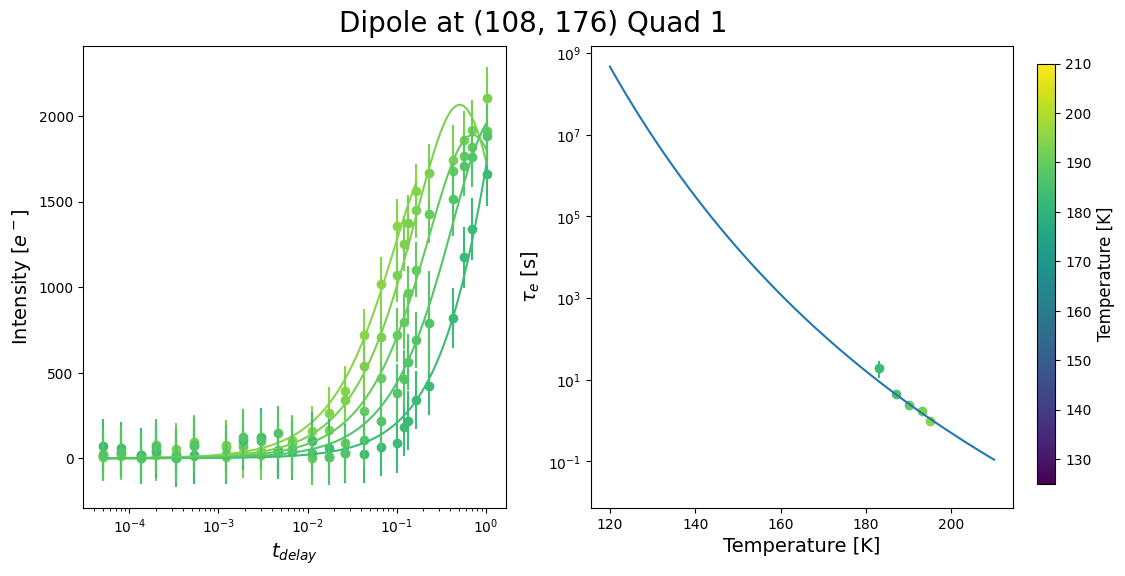

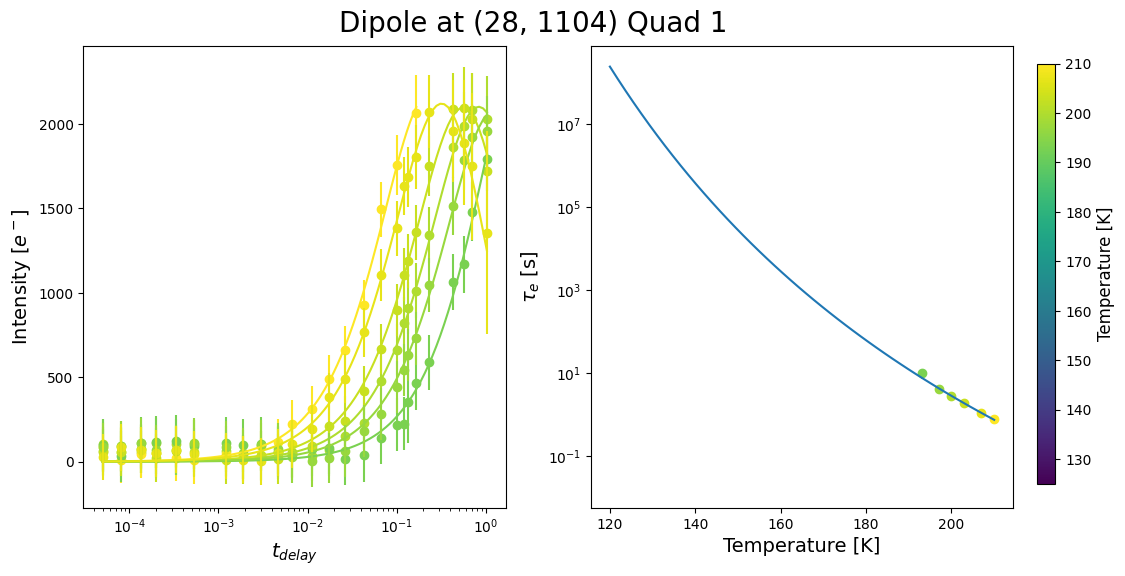

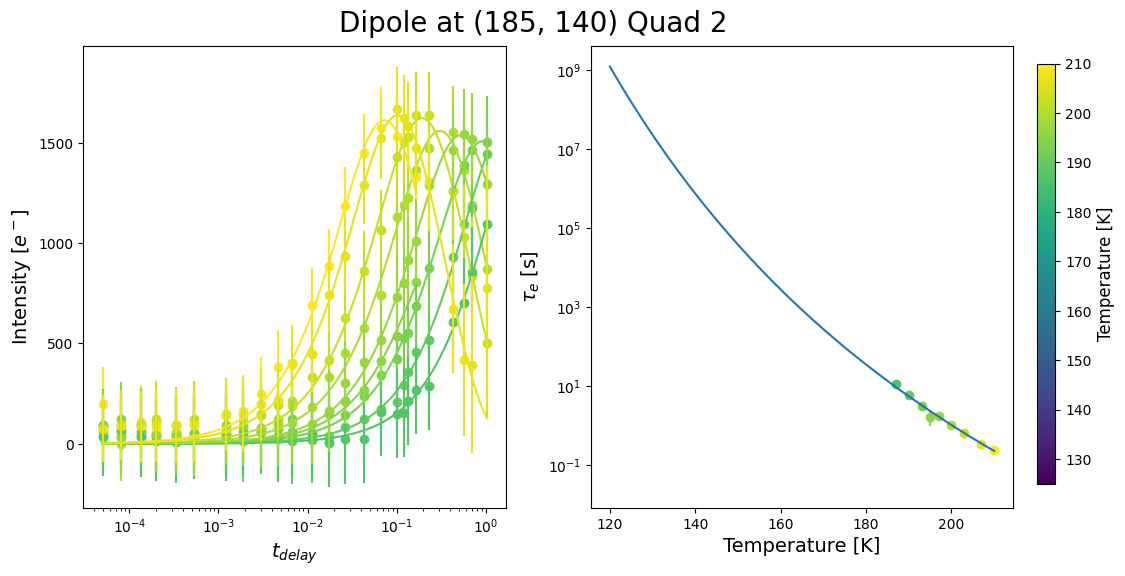

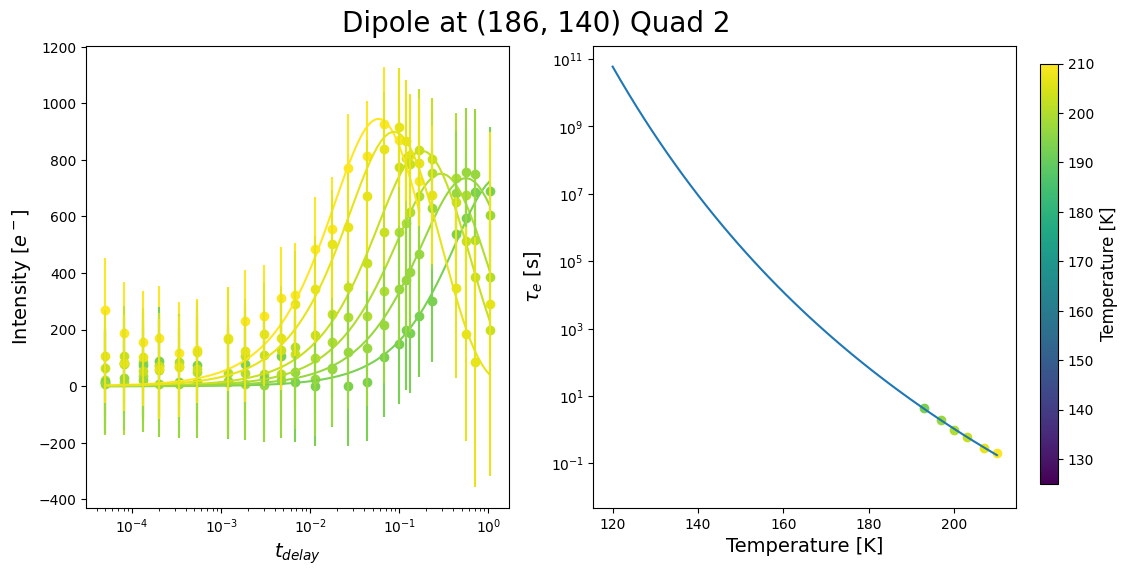

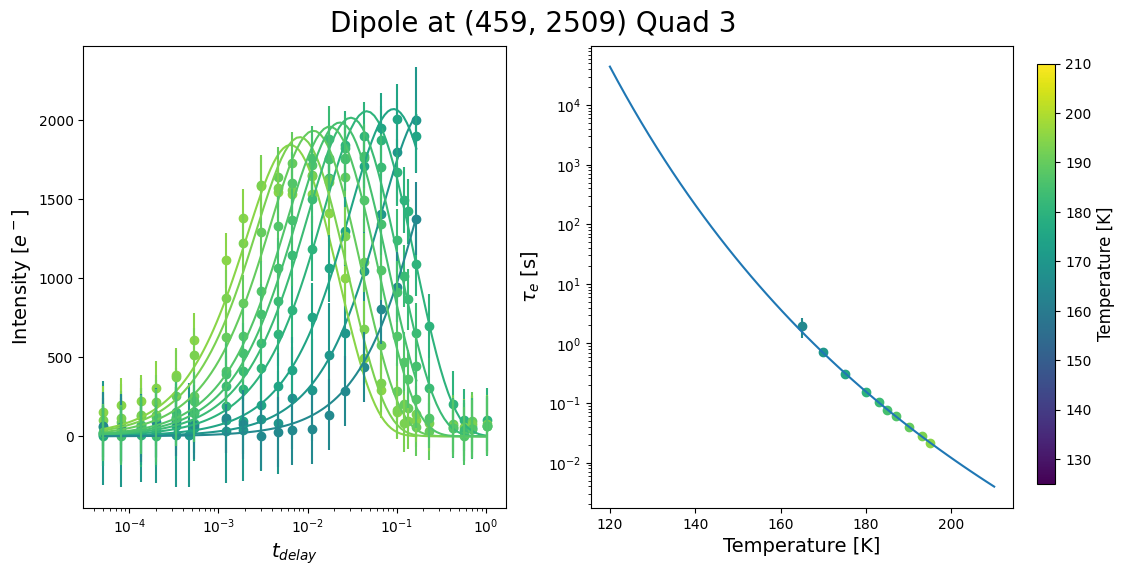

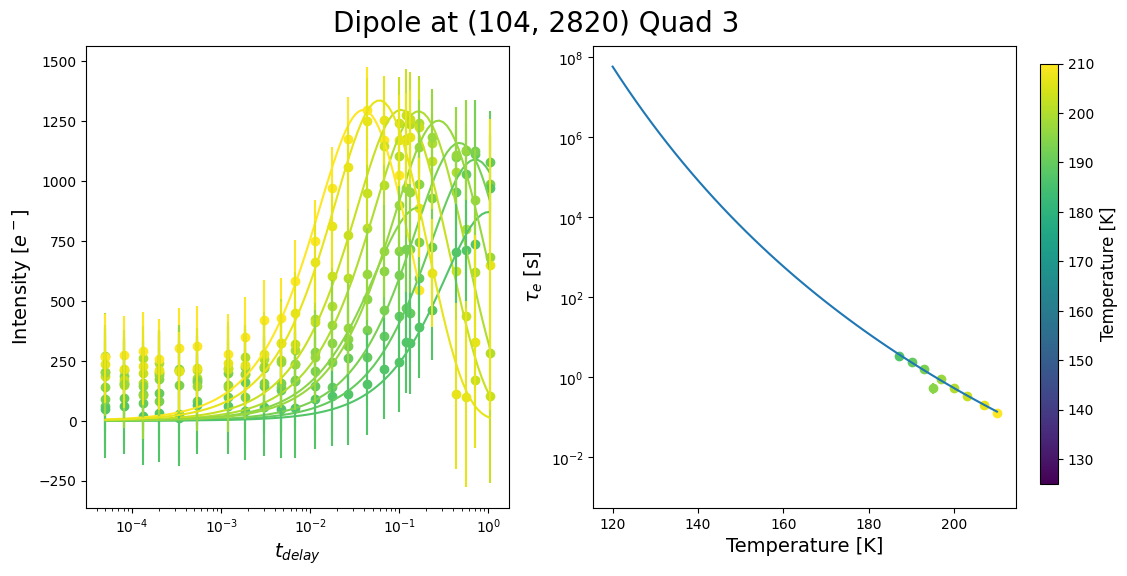

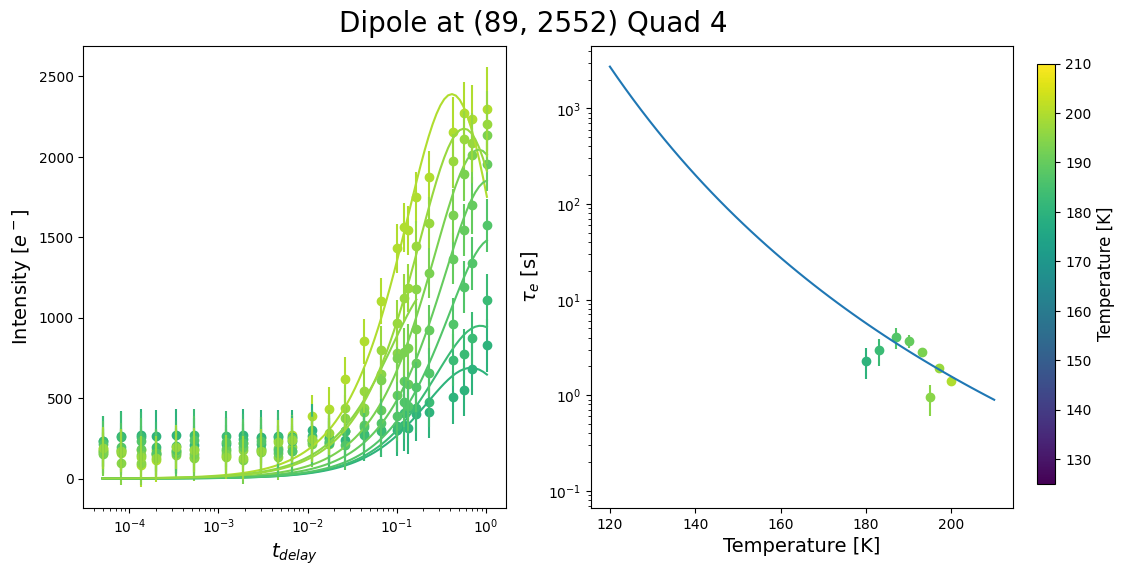

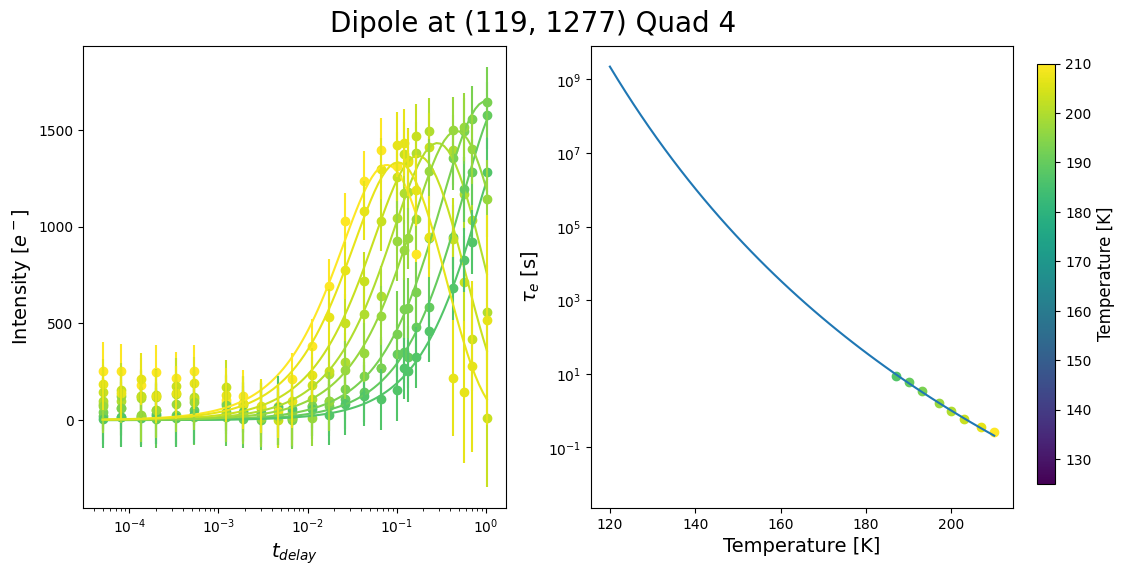

Number of Good Energy Fits Plotted: 
65


In [71]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n) 


import random
numGoodFits = 0
numBadFits = 0
cmap = plt.cm.viridis
# cmap = plt.cm.managua_r
maxGood = 2

import matplotlib.colors as colors
norm = colors.Normalize(vmin=125,vmax=210)
r2s = []
chi2s = []
pvals = []
red_chi2s = []
goodness_of_fit_metrics = []
energy_crossSections  = []
tau_temp_fits = []
maxtaus = []

energy_cs_correlations = []
tau_amp_correlations = []
for q in [0,1,2,3]:
    numGood = 0
    
    dpkeys = list(fit_dipole_spectra[q])
    for i in range(len(dpkeys)):
        
        # dpkeys = list(fit1_dipole_spectra[q])
        # dp = random.choice(dpkeys)
        dp = dpkeys[i]
        if type(dp) != tuple:
            continue
        testdp = fit_dipole_spectra[q][dp]
        if testdp['WellBehavedTrap'] and not testdp['EnergyFitFailed']:
            testdpfit = testdp['EnergyFitInfo']

            p_value = testdpfit['p_value'] 
            chi_squared = testdpfit['chi2']
            r2 = testdpfit['r_squared']

            pvals.append(p_value)
            chi2s.append(chi_squared)
            r2s.append(r2)
            red_chi2s.append( testdpfit['reduced_chi2'])


            fit_is_good = chi_squared < 100

            fit_is_good = p_value < 0.05
            fit_is_good = testdp["GoodEnergyFit"]
            # fit_is_good = fit_is_good and 
            maxtau = np.max(testdpfit['taus'])
            maxtaus.append(maxtau)
            # fit_is_good = fit_is_good
            # fit_is_good = True


            if fit_is_good:
                cs = testdpfit['BestFitCrossSection']
                cserr = testdpfit['BestFitCrossSectionErr']
                e = testdpfit['BestFitEnergy']
                e_err = testdpfit['BestFitEnergyErr']

                 # temperatures = np.linspace(120,180,100)
                logtau_at_135 = log_energy_cross_section(135,e,np.log(cs))

                tau_at_135 = np.exp(logtau_at_135)
                
                #uncheck this to filter
                if tau_at_135 < 100:
                    continue


                pcov = testdpfit['CovarianceMatrix']
                perr1 = cserr / cs
                perr = np.array([testdpfit['BestFitEnergyErr'],perr1])
                corr_matrix = pcov / np.outer(perr, perr)
                avg_corr = (corr_matrix[0,1] + corr_matrix[1,0])/2
                energy_cs_correlations.append(avg_corr)
                # if testdp["GoodEnergyFit"]:
                energy_crossSections.append((cs,e,cserr,e_err))
                tau_temp_fits.append([testdpfit['temperatures'],testdpfit['taus'],testdpfit['tau_errs']])
                goodness_of_fit_metrics.append(testdpfit['reduced_chi2'])

               

                for temp in testdp.keys():
                    if type(temp) != int:
                            continue
                        
                    dipole = testdp[temp]
                    if dipole['GoodIntensityFit']:
                        pcov = dipole['IntensityFitInfo']['covariance_matrix']
                        perr = np.array([dipole['IntensityFitInfo']['fit_coeff_err'],dipole['IntensityFitInfo']['fit_tau_err']])
                        corr_matrix = pcov / np.outer(perr, perr)
                        avg_corr = (corr_matrix[0,1] + corr_matrix[1,0])/2
                        tau_amp_correlations.append(avg_corr)
                if numGood  < maxGood:
                    numGood+=1
                    
                    

                    fig, ax = plt.subplots(1,2,figsize=(12,6))
                    fig.suptitle(f"Dipole at {int(dp[0]),int(dp[1])} Quad {q+1}",fontsize=20,y=0.94)
                    ax[0].set_xlabel('$t_{delay}$',fontsize=14)
                    ax[0].set_ylabel('Intensity [$e^-$]',fontsize=14)

                    ax[1].set_xlabel('Temperature [K]',fontsize=14)
                    ax[1].set_ylabel('$\\tau_e$ [s]',fontsize=14)

                    ax[0].set_xscale('log')
                    ax[1].set_yscale('log')
                    for temp in testdp.keys():
                        if type(temp) != int:
                            continue

                        color = cmap(norm(temp))
                        dipole = testdp[temp]
                        if dipole['GoodIntensityFit']:
                            sigma_image = dipole['image_sigma']
                            # print('**************************')
                            # print(temp)
                            # print('max intensity')
                            # print(np.max(dipole['intensities']))
                            # print(dipole['seconds'][np.argmax(dipole['intensities'])])
                            # print('3* sigma of image')
                            # print(3 * sigma_image)
                            # print("P-value")
                            # print(dipole['IntensityFitInfo']['p_value'])
                            # print("Chi2")
                            # print(dipole['IntensityFitInfo']['chi_squared'])
                            # print("r2")
                            # print(dipole['IntensityFitInfo']['r_squared'])
                            # print('r2 of linear fit')
                            # print(dipole['IntensityFitInfo']['lin_r_squared'])

                            # print('**************************')
                            ax[0].scatter(dipole['seconds'],dipole['intensities'],color=color)
                            if useIntensityErr:
                                ax[0].errorbar(dipole['seconds'],dipole['intensities'],yerr=dipole['intensity_err'],color=color,ls='None')
                            else:
                                ax[0].errorbar(dipole['seconds'],dipole['intensities'],yerr=dipole['poisson_err'],color=color,ls='None')

                            seconds = np.geomspace(np.min(dipole['seconds']),np.max(dipole['seconds']),100)
                            fit_ints = intensity_function(seconds,dipole['IntensityFitInfo']['fit_coeff'],dipole['IntensityFitInfo']['fit_tau'])
                            ax[0].plot(seconds,fit_ints,ls='-',color=cmap(norm(temp)))
                            
                            # print("************")
                            # print("TEMPERATURE")
                            # print(temp)
                            # print("Correlation Matrix between τ and amplitude")
                            # print(corr_matrix)

                            # print("************")

                    
                    
                    
                    # if testdp['']
                    for t in range(len(testdpfit['temperatures'])):
                        temp = testdpfit['temperatures'][t]
                        color = cmap(norm(temp))
                        tau = testdpfit['taus'][t]
      
                        ax[1].scatter(temp,tau,color=color)
                        tau_err = testdpfit['tau_errs'][t]

                        ax[1].errorbar(temp,tau,yerr=tau_err,ls='None',color=color)


                    


        
                    # print("Correlation Matrix between σ and Ε")
                    # print(corr_matrix)
                
                    # print("************")
                    temperatures = np.linspace(120,210,50)
                    log_fit_taus = log_energy_cross_section(temperatures,testdpfit['BestFitEnergy'],np.log(testdpfit['BestFitCrossSection']))
                    fit_taus = np.exp(log_fit_taus)
                    ax[1].plot(temperatures,fit_taus)
                    import matplotlib.cm as cmx
                    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
                    sm.set_array([])  # Required for ScalarMappable to work correctly
                    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
                    cbar = fig.colorbar(sm, cax=cbar_ax)
                    
                    cbar.set_label('Temperature [K]',fontsize=12)
                    # plt.tight_layout()
                    plt.show()
                    plt.close()
               










print("Number of Good Energy Fits Plotted: ")
print(len(energy_crossSections))
# cmap = get_cmap(len(energy_crossSections),name='Spectral')


In [72]:
energy_cs_correlations = np.array(energy_cs_correlations)
tau_amp_correlations = np.array(tau_amp_correlations)
tau_amp_correlations.shape,energy_cs_correlations.shape

((561,), (65,))

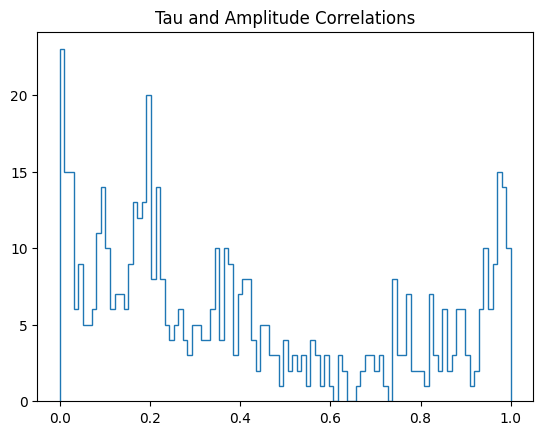

In [73]:
hist,bins = np.histogram(np.abs(tau_amp_correlations),bins=np.linspace(0,1,100))
plt.stairs(hist,bins)
plt.title("Tau and Amplitude Correlations")
plt.show()
plt.close()

Text(0.5, 1.0, 'Energy and CS Correlations')

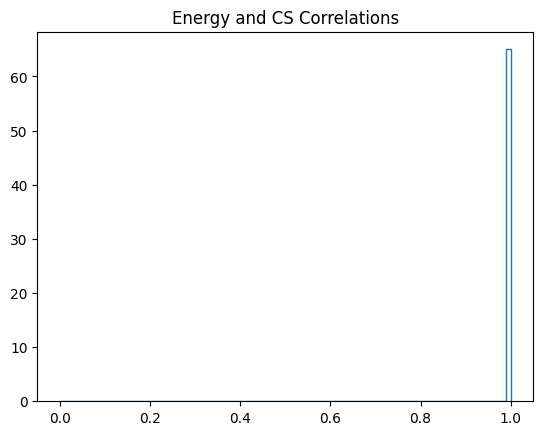

In [74]:
hist,bins = np.histogram(energy_cs_correlations,bins=np.linspace(0,1,100))
plt.stairs(hist,bins)
plt.title("Energy and CS Correlations")

19.82491089277192


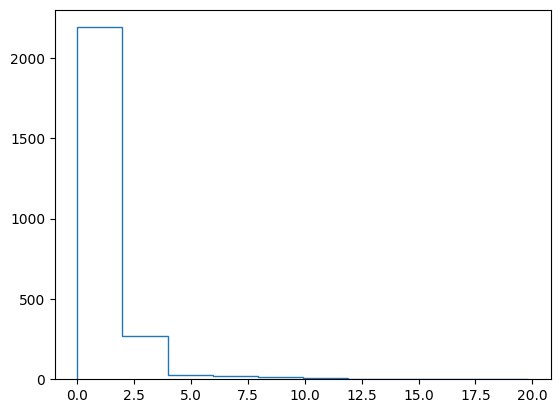

In [75]:
hist,bins = np.histogram(maxtaus)
plt.stairs(hist,bins)
max_tau = np.max(maxtaus)
print(np.max(maxtaus))

In [76]:
max_tau = 0
for t in range(len(tau_temp_fits)):
    tau = tau_temp_fits[t][1]
    if max_tau < np.max(tau):
        max_tau = np.max(tau)
max_tau

np.float64(19.82491089277192)

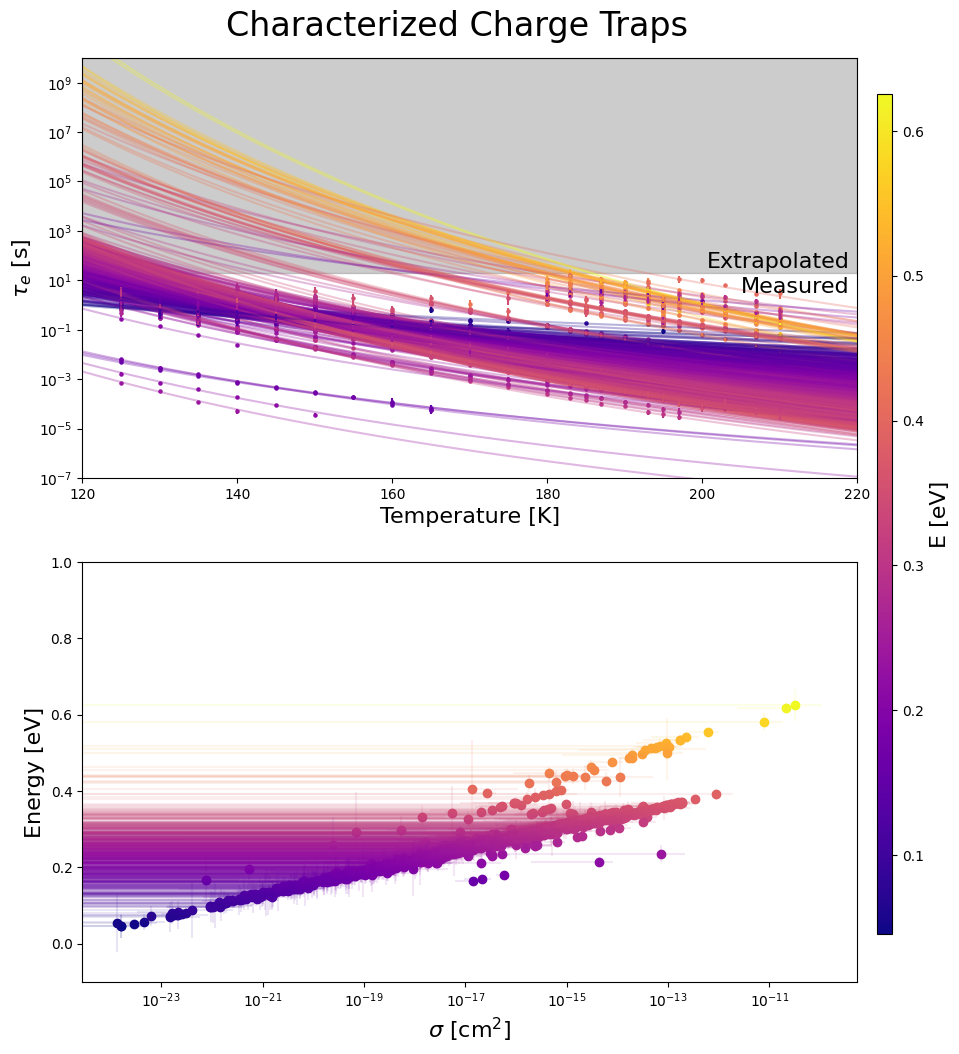

In [23]:
fig, ax= plt.subplots(2,figsize=(10,12))#,layout='constrained')
fit_temp = np.linspace(120,220,100)

cmap = plt.cm.plasma
energies = np.array(energy_crossSections)[:,1]
measured_taus = []
extrapolated_taus = []
# print(len(energies),len(energy_crossSections))
norm = colors.Normalize(vmin=np.min(energies),vmax=np.max(energies))
for d,data in enumerate(energy_crossSections):
    temperatures = tau_temp_fits[d][0]
    taus = tau_temp_fits[d][1]
    tau_errs = tau_temp_fits[d][2]
    energy = data[1]
    color = cmap(d)
    color = cmap(norm(energy))

    log_tau_fit = log_energy_cross_section(fit_temp,data[1],np.log(data[0]))

    log_tau_at_135 = log_energy_cross_section(135,data[1],np.log(data[0]))

    tau_at_135 = np.exp(log_tau_at_135)
    tau_fit = np.exp(log_tau_fit)
    if 135 not in temperatures: 
        extrapolated_taus.append(tau_at_135)
    else:
        measured_taus.append(tau_at_135)

    
    ax[0].plot(fit_temp,tau_fit,color=color,alpha=0.3)
    ax[0].scatter(temperatures,taus,color=color,s=5)
    ax[0].errorbar(temperatures,taus,yerr=tau_errs,color=color,ls="None")
    ax[1].scatter(data[0],data[1],color=color)
    ax[1].errorbar(data[0],data[1],xerr=data[2],yerr=data[3],ls='None',color=color,alpha=0.1)

ax[0].text(219,3.16e1,"Extrapolated",fontsize=16,ha='right')
ax[0].text(219,3.16,"Measured",fontsize=16,ha='right')

ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].fill_between(fit_temp,np.ones_like(fit_temp)*max_tau,np.ones_like(fit_temp)*1e10,color='grey',alpha=0.4)
ax[0].set_ylim(1e-7,1e10)
ax[0].set_xlim(120,220)

ax[0].set_xlabel("Temperature [K]",fontsize=16)
ax[0].set_ylabel("$\\tau_e$ [s]",fontsize=16)

ax[1].set_xlabel("$\sigma$ [cm$^2$]",fontsize=16)
ax[1].set_ylabel("Energy [eV]",fontsize=16)
ax[1].set_ylim(-0.1,1)
fig.suptitle("Characterized Charge Traps",fontsize=24,y=0.92)
# plt.tight_layout()
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Required for ScalarMappable to work correctly
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)

cbar.set_label('E [eV]',fontsize=16)
plt.show()
plt.close()

measured_taus = np.array(measured_taus)
extrapolated_taus = np.array(extrapolated_taus)

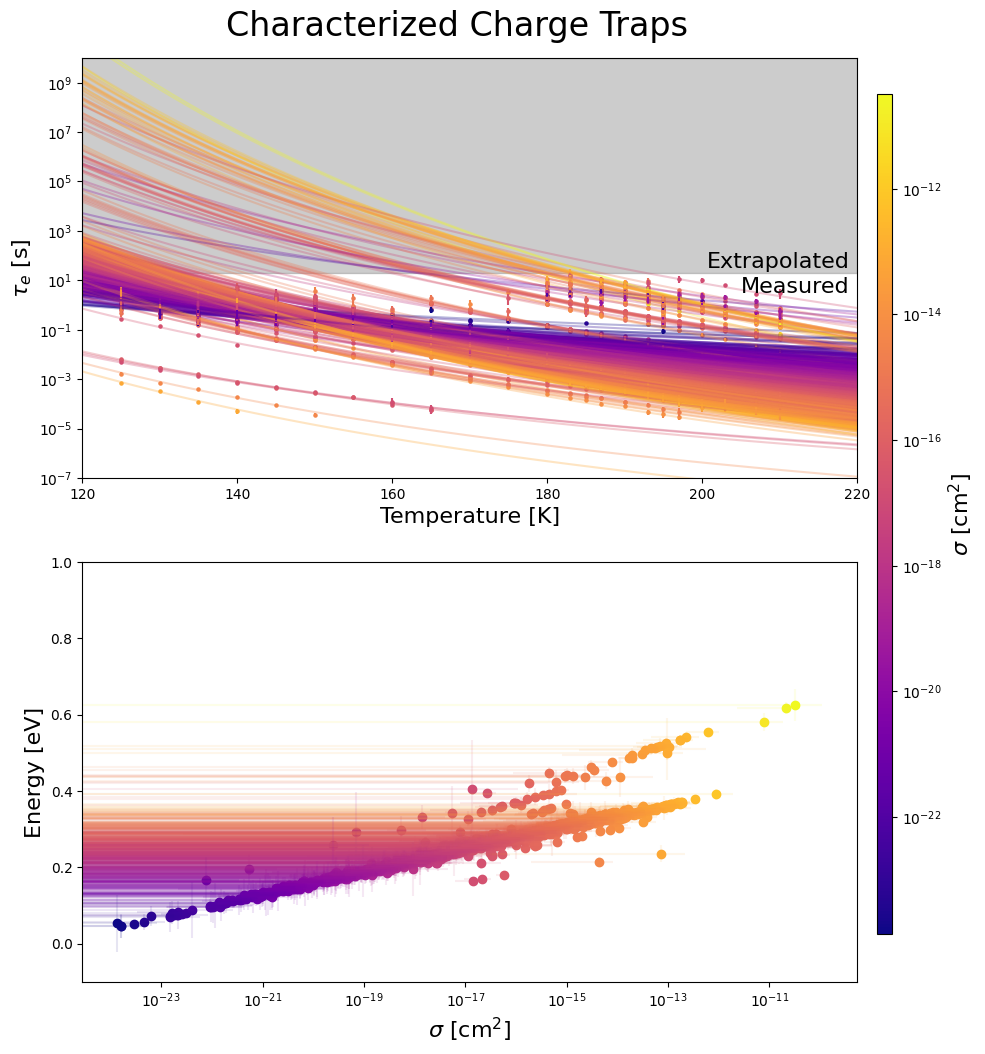

In [24]:
fig, ax= plt.subplots(2,figsize=(10,12))
fit_temp = np.linspace(120,220,100)

cmap = plt.cm.plasma
cross_sections = np.array(energy_crossSections)[:,0]

# print(len(energies),len(energy_crossSections))
norm = colors.LogNorm(vmin=np.min(cross_sections),vmax=np.max(cross_sections))
for d,data in enumerate(energy_crossSections):
    temperatures = tau_temp_fits[d][0]
    taus = tau_temp_fits[d][1]
    tau_errs = tau_temp_fits[d][2]
    energy = data[1]
    cs = data[0]
    color = cmap(d)
    color = cmap(norm(cs))

    log_tau_fit = log_energy_cross_section(fit_temp,data[1],np.log(data[0]))
    tau_fit = np.exp(log_tau_fit)
    ax[0].plot(fit_temp,tau_fit,color=color,alpha=0.3)
    ax[0].scatter(temperatures,taus,color=color,s=5)
    ax[0].errorbar(temperatures,taus,yerr=tau_errs,color=color,ls="None")
    ax[1].scatter(data[0],data[1],color=color)
    ax[1].errorbar(data[0],data[1],xerr=data[2],yerr=data[3],ls='None',color=color,alpha=0.1)


ax[0].text(219,3.16e1,"Extrapolated",fontsize=16,ha='right')
ax[0].text(219,3.16,"Measured",fontsize=16,ha='right')

ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[0].fill_between(fit_temp,np.ones_like(fit_temp)*max_tau,np.ones_like(fit_temp)*1e10,color='grey',alpha=0.4)
ax[0].set_ylim(1e-7,1e10)
ax[0].set_xlim(120,220)

ax[0].set_xlabel("Temperature [K]",fontsize=16)
ax[0].set_ylabel("$\\tau_e$ [s]",fontsize=16)

ax[1].set_xlabel("$\sigma$ [cm$^2$]",fontsize=16)
ax[1].set_ylabel("Energy [eV]",fontsize=16)
ax[1].set_ylim(-0.1,1)
fig.suptitle("Characterized Charge Traps",fontsize=24,y=0.92)
# plt.tight_layout()
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Required for ScalarMappable to work correctly
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\sigma$ [cm$^2$]',fontsize=16)
plt.show()
plt.close()

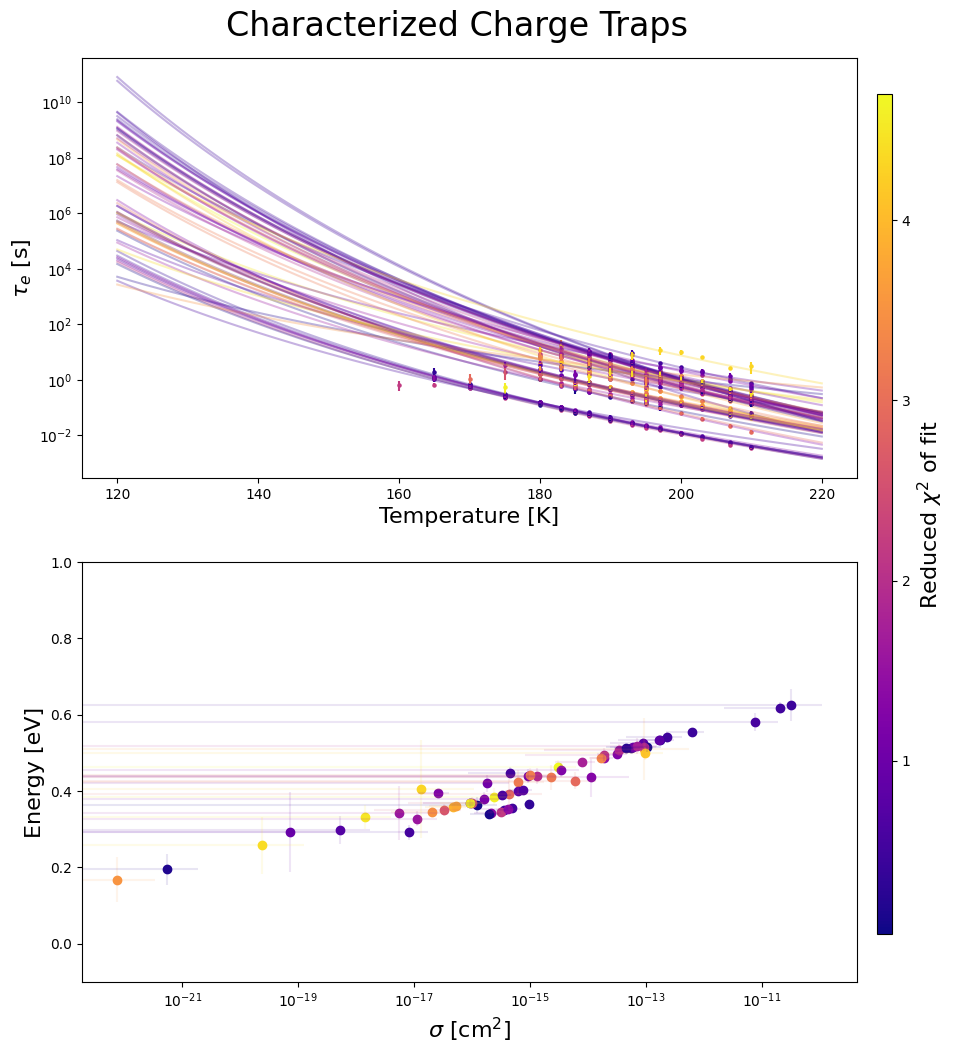

In [28]:
fig, ax= plt.subplots(2,figsize=(10,12))
fit_temp = np.linspace(120,220,100)

cmap = plt.cm.plasma
reduced_chi2s = np.array(goodness_of_fit_metrics)
# print(len(energies),len(energy_crossSections))
norm = colors.Normalize(vmin=np.min(reduced_chi2s),vmax=np.max(reduced_chi2s))
# norm = colors.LogNorm(vmin=np.min(reduced_chi2s),vmax=np.max(reduced_chi2s))

for d,data in enumerate(energy_crossSections):
    temperatures = tau_temp_fits[d][0]
    taus = tau_temp_fits[d][1]
    tau_errs = tau_temp_fits[d][2]
    energy = data[1]
    color = cmap(d)
    rch2 = goodness_of_fit_metrics[d]
    color = cmap(norm(rch2))

    log_tau_fit = log_energy_cross_section(fit_temp,data[1],np.log(data[0]))
    tau_fit = np.exp(log_tau_fit)
    ax[0].plot(fit_temp,tau_fit,color=color,alpha=0.3)
    ax[0].scatter(temperatures,taus,color=color,s=5)
    ax[0].errorbar(temperatures,taus,yerr=tau_errs,color=color,ls="None")
    ax[1].scatter(data[0],data[1],color=color)
    ax[1].errorbar(data[0],data[1],xerr=data[2],yerr=data[3],ls='None',color=color,alpha=0.1)


ax[0].set_yscale('log')
ax[1].set_xscale('log')


ax[0].set_xlabel("Temperature [K]",fontsize=16)
ax[0].set_ylabel("$\\tau_e$ [s]",fontsize=16)

ax[1].set_xlabel("$\sigma$ [cm$^2$]",fontsize=16)
ax[1].set_ylabel("Energy [eV]",fontsize=16)
ax[1].set_ylim(-0.1,1)
fig.suptitle("Characterized Charge Traps",fontsize=24,y=0.92)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Required for ScalarMappable to work correctly
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax)

cbar.set_label('Reduced $\chi^2$ of fit',fontsize=16)
# plt.tight_layout()
plt.show()
plt.close()

292
1827


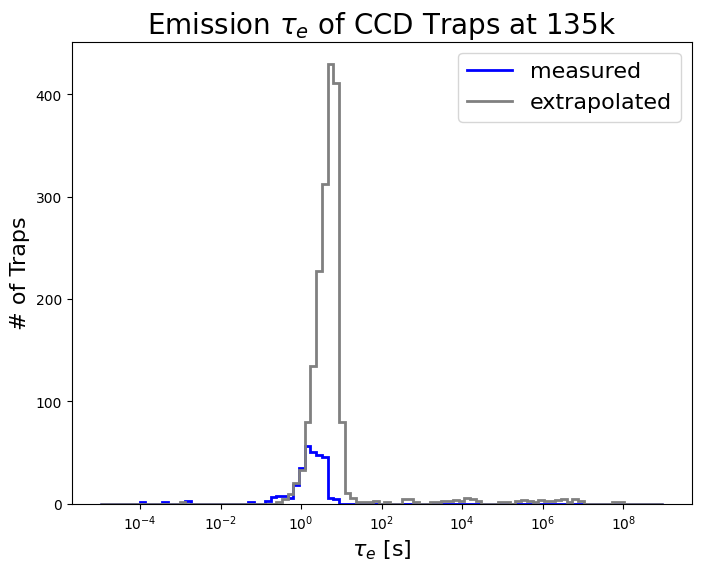

In [26]:

plt.figure(figsize=(8,6))
print(len(measured_taus))
print(len(extrapolated_taus))
bins = np.geomspace(1e-5,1e9,100)
mhist,mbins = np.histogram(measured_taus,bins=bins)
ehist,ebins = np.histogram(extrapolated_taus,bins=bins)

plt.stairs(mhist,mbins,color='blue',label='measured',lw=2)
plt.stairs(ehist,ebins,color='grey',label='extrapolated',lw=2)
plt.legend(fontsize=16)
plt.title("Emission $\\tau_e$ of CCD Traps at 135k",fontsize=20)
plt.xlabel('$\\tau_e$ [s]',fontsize=16)
plt.ylabel("# of Traps",fontsize=16)
plt.xscale('log')
# plt.yscale('log')
plt.show()
plt.close()

In [43]:

# energy_crossSections = np.array(energy_crossSections)
# energy_crossSections[np.where(energy_crossSections[:,1] <1e-5)]

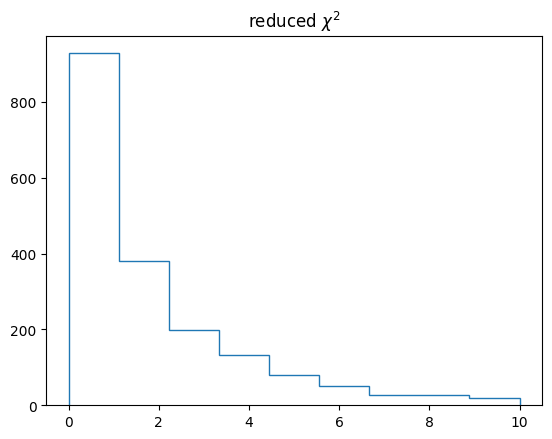

(np.int64(1261), np.int64(680))

In [37]:
red_chi2s = np.array(red_chi2s)

bins = np.linspace(0,10,10)
hist,bins = np.histogram(red_chi2s,bins=bins)
plt.stairs(hist,bins)
plt.title('reduced $\chi^2$')
plt.show()
plt.close()
np.sum(red_chi2s < 2),np.sum(red_chi2s >= 2)

In [38]:
# bins = np.linspace(0,1,100)
# hist,bins = np.histogram(pvals,bins=bins)
# plt.stairs(hist,bins)
# plt.title('$p$')
# plt.show()
# plt.close()

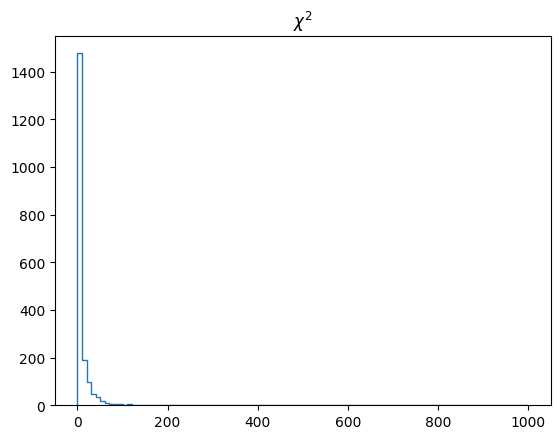

In [39]:
bins = np.linspace(0,1000,100)
hist,bins = np.histogram(chi2s,bins=bins)
plt.stairs(hist,bins)
plt.title('$\chi^2$')
plt.show()
plt.close()

In [40]:
# r2s = np.array(r2s)
# bins =  np.linspace(0,5,50)

# hist,bins = np.histogram(r2s,bins=bins)
# plt.stairs(hist,bins)
# plt.title('$r^2$')
# plt.show()
# plt.close()
# np.sum((r2s < 1 + .25) & (r2s > 1-0.25)),r2s.shape

In [ ]:
import xml.etree.ElementTree as ET
import os

def append_mask_to_existing_xml(filename, ltaname, chargeTraps):
    if not os.path.exists(filename):
        # If file doesn't exist, create the root element
        root = ET.Element('extractConfig')
        tree = ET.ElementTree(root)
    else:
        tree = ET.parse(filename)
        root = tree.getroot()

    # Create new ccdMask entry
    ccd_mask = ET.Element('ccdMask', attrib={'ltaname': str(ltaname)})

    # Add badPixels
    bad_pixels_elem = ET.SubElement(ccd_mask, 'chargeTraps')
    for hdu, pixels in chargeTraps.items():
        for x, y in pixels:
            ET.SubElement(bad_pixels_elem, 'pixel', attrib={
                'hdu': str(hdu),
                'x': str(x),
                'y': str(y)
            })

    # Append the new ccdMask to root
    root.append(ccd_mask)

    # Pretty print and save
    ET.indent(tree, cd="  ")  # Requires Python 3.9+
    outfilename = 'extractConfig_chargetraps.xml'
    tree.write(filename, encoding='utf-8', xml_declaration=True)


In [58]:
fname = 'extractConfig.xml'

tree = ET.parse(fname)
root = tree.getroot()
ccdMask = root.findall('ccdMask')
for category in ccdMask:
        category_name = category.tag
        print(f"  Category: {category_name}")

  Category: ccdMask
  Category: ccdMask


In [60]:
chargetrapdict = {}
for q in range(len(full_dipole_coord_list)):
    chargetrapdict[q+1] = full_dipole_coord_list[q]
chargetrapdict

append_mask_to_existing_xml('extractConfig.xml', 2, chargetrapdict)